##XYZ Corporation Lending Data Project

##Problem Statement:
To predict the probability of default, whether the customer will default the loan or not. 
The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.
The data should be divided into train (June 2007 - May 2015) and out-of-time test (June 2015 - Dec 2015) data. We have to use the training data to build models/analytical solution and finally apply it to test data to measure the performance and robustness of the models. 
Use the variable : 'issue_d' to divide the data in the above time periods, the variable is in <month>-<year> format.


#Data Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from June 2007 to Dec 20015.

#Content
There are 73 variables:
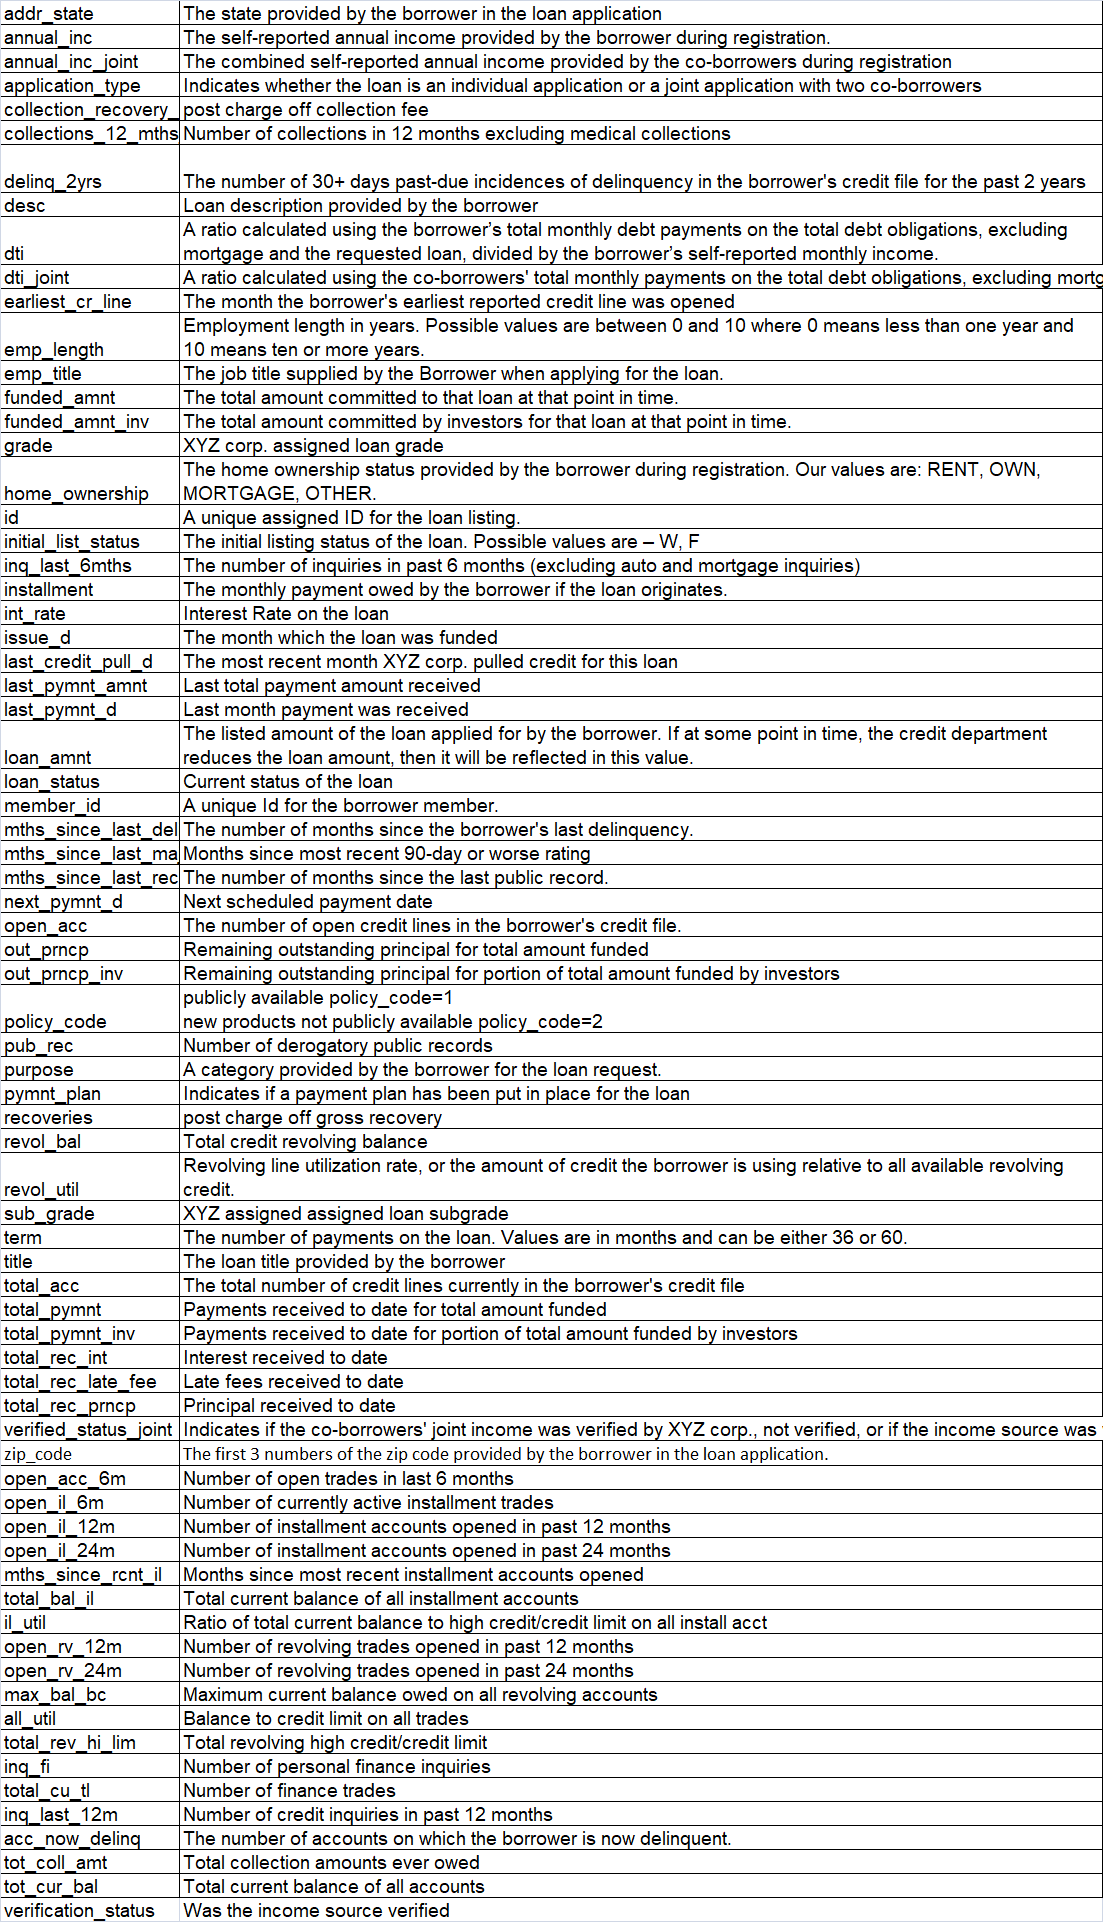

Connect Google Drive to Colab to import data set from Google Drive

In [1]:
#Connecting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Import data from Drive with the help of Pandas.
It is a text data so import it as CSV file by using '\t' delimiter. It gives us structural data set format. Its help to understand our data.

In [3]:
Credit_data = pd.read_csv ('/content/drive/MyDrive/Python Project - Bank Lending/XYZCorp_LendingData.txt', delimiter='\t', low_memory=False)


# Analyze data

In [4]:
Credit_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000

In [5]:
Credit_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [6]:
Credit_data.shape

(855969, 73)

In [7]:
Credit_data.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

Checking data types of each column

In [8]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

#Exploratory data analysis

In [9]:
Credit_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

# Checking for missing value

In [10]:
missing= Credit_data.isnull().sum().sort_values(ascending=False)

In [11]:
Percentage_missing = (Credit_data.isnull().sum()/Credit_data.isnull().count()*100).sort_values(ascending = False)

In [12]:
missing_data = pd.concat([missing, Percentage_missing], axis= 1, keys= ['missing', 'Percentage_missing'])

In [13]:
missing_data.head(40)

,missing,Percentage_missing
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


# Visualising  of missing values for easy undertanding

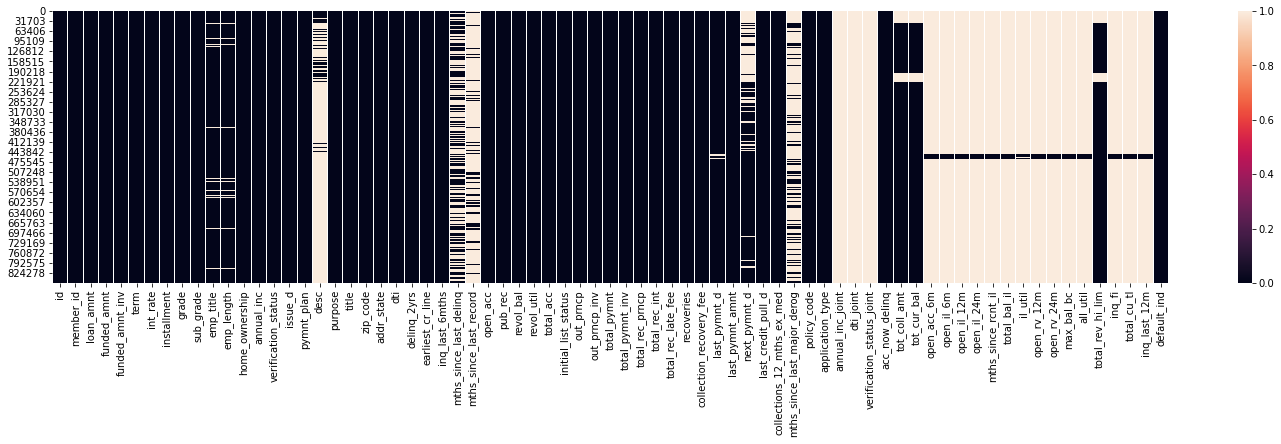

In [14]:
plt.figure(figsize=(25,5))
sns.heatmap(Credit_data.isnull(),  vmin=0, vmax=1)

Droping the columns which have more than 50% missing values

In [15]:
for i in Credit_data.columns:
  if missing_data.loc[i, 'Percentage_missing']>=50:
    Credit_data = Credit_data.drop(i, axis= 1)



In [16]:
Credit_data.shape

(855969, 52)

Checking the missing values after droping the variavbles having more than 50% of missing data

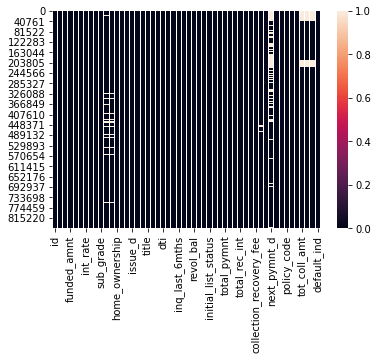

In [17]:
sns.heatmap(Credit_data.isnull())

In [18]:
Credit_data.duplicated().value_counts()

False    855969
dtype: int64




No Duplicated Found

Let us see how many Object features

In [19]:
df_feature_categorical= Credit_data.select_dtypes(include=[np.object])
df_feature_categorical

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,NaN,Jan-2016,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,n,car,bike,309xx,GA,Apr-1999,f,Apr-2013,NaN,Sep-2013,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,NaN,Jan-2016,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,n,other,personel,917xx,CA,Feb-1996,f,Jan-2015,NaN,Jan-2015,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,n,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36 months,B,B5,Office Assistant,8 years,RENT,Verified,Jan-2015,n,debt_consolidation,Debt consolidation,905xx,CA,Sep-2004,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
855965,36 months,B,B5,Director of Maintenance,10+ years,MORTGAGE,Verified,Jan-2015,n,home_improvement,Home improvement,072xx,NJ,Mar-1974,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
855966,60 months,D,D2,Radiologist Technologist,5 years,RENT,Verified,Jan-2015,n,debt_consolidation,Debt consolidation,378xx,TN,Sep-2003,w,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL
855967,60 months,E,E3,Painter,1 year,RENT,Source Verified,Jan-2015,n,debt_consolidation,Debt consolidation,010xx,MA,Oct-2003,w,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL


In [20]:
df_feature_categorical.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [21]:
categorical = df_feature_categorical.columns
categorical = Credit_data[categorical]
for i in df_feature_categorical.columns:
  categorical[i]= categorical[i].fillna('None')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
categorical.isnull().sum()

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
issue_d                0
pymnt_plan             0
purpose                0
title                  0
zip_code               0
addr_state             0
earliest_cr_line       0
initial_list_status    0
last_pymnt_d           0
next_pymnt_d           0
last_credit_pull_d     0
application_type       0
dtype: int64

Check Numerical values and treat them

In [23]:
df_feature_Numerical= Credit_data.select_dtypes(include=[np.number])
df_feature_Numerical

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000.0,10000.0,10000.0,11.99,332.10,31000.0,28.69,0.0,0.0,9.0,1.0,14037.0,82.1,15.0,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,332.10,0.0,1.0,0.0,0.0,25274.0,17100.0,0
855965,36441262,39152692,24000.0,24000.0,24000.0,11.99,797.03,79000.0,3.90,0.0,1.0,5.0,0.0,8621.0,84.5,23.0,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,797.03,0.0,1.0,0.0,0.0,140285.0,10200.0,0
855966,36271333,38982739,13000.0,13000.0,13000.0,15.99,316.07,35000.0,30.90,0.0,0.0,9.0,1.0,11031.0,61.3,22.0,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,316.07,0.0,1.0,0.0,0.0,34178.0,18000.0,0
855967,36490806,39222577,12000.0,12000.0,12000.0,19.99,317.86,64400.0,27.19,1.0,2.0,17.0,0.0,8254.0,30.6,20.0,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,317.86,1.0,1.0,0.0,0.0,58418.0,27000.0,0


In [24]:
df_feature_Numerical.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [25]:
Numerical= df_feature_Numerical.columns
Numerical = Credit_data[Numerical]
for i in df_feature_Numerical.columns:
  Numerical[i]= Numerical[i].fillna(Numerical[i].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
Numerical.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

# Concatenate Cateorical and Numerical data

In [27]:
Credit_data1 = pd.concat([categorical,Numerical], axis= 1)

In [28]:
Credit_data1.shape

(855969, 52)

In [29]:
Credit_data1.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,36 months,B,B2,None,10+ years,RENT,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,Jan-1985,f,Jan-2015,None,Jan-2016,INDIVIDUAL,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0,0.0,81008.5,23800.0,0
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,n,car,bike,309xx,GA,Apr-1999,f,Apr-2013,None,Sep-2013,INDIVIDUAL,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0,0.0,81008.5,23800.0,1
2,36 months,C,C5,None,10+ years,RENT,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,Nov-2001,f,Jun-2014,None,Jan-2016,INDIVIDUAL,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0,0.0,81008.5,23800.0,0
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,n,other,personel,917xx,CA,Feb-1996,f,Jan-2015,None,Jan-2015,INDIVIDUAL,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0,0.0,81008.5,23800.0,0
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,n,other,Personal,972xx,OR,Jan-1996,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,1075358,1311748,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0,0.0,81008.5,23800.0,0


# Data visualization

# Check for traget values data

In [30]:
Credit_data1['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

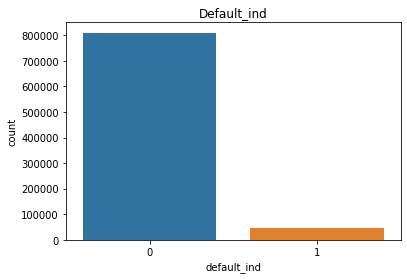

In [31]:
sns.countplot(x= 'default_ind', data= Credit_data1)
plt.title('Default_ind')

plt.show()

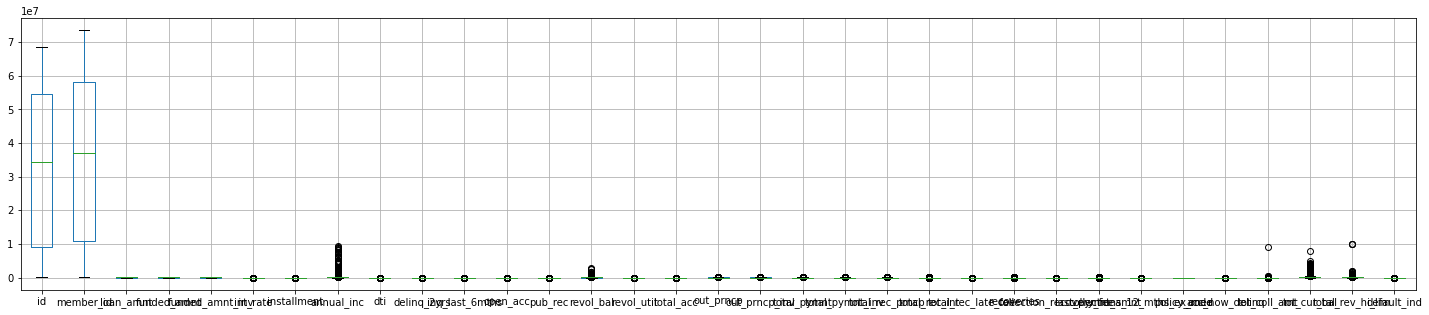

In [32]:
plt.figure(figsize= (25,5))
Credit_data1.boxplot()

#visualization of importent features

Term- The numbers of payment on the loan. values are in the month and can be either 36 or 60 month

Text(0, 0.5, 'Count')

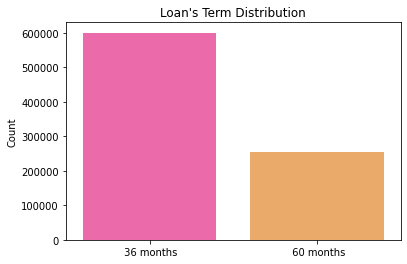

In [33]:
sns.barplot(y=Credit_data1.term.value_counts(), x=Credit_data1.term.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

Amount distribution

Text(0.5, 1.0, 'Intstallment rate')

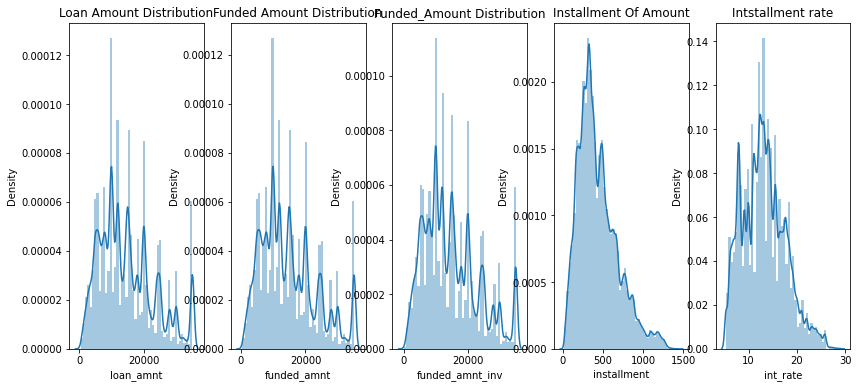

In [34]:
fig, ax = plt.subplots(1, 5, figsize=(14,6))
sns.distplot(Credit_data1['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")

sns.distplot(Credit_data1['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

sns.distplot(Credit_data1['funded_amnt_inv'], ax= ax[2])
ax[2].set_title("Funded_Amount Distribution")

sns.distplot(Credit_data1['installment'], ax= ax[3])
ax[3].set_title("Installment Of Amount")

sns.distplot(Credit_data1['int_rate'],ax= ax[4])
ax[4].set_title("Intstallment rate")



Grade Count

Text(0.5, 1.0, 'Grade Count')

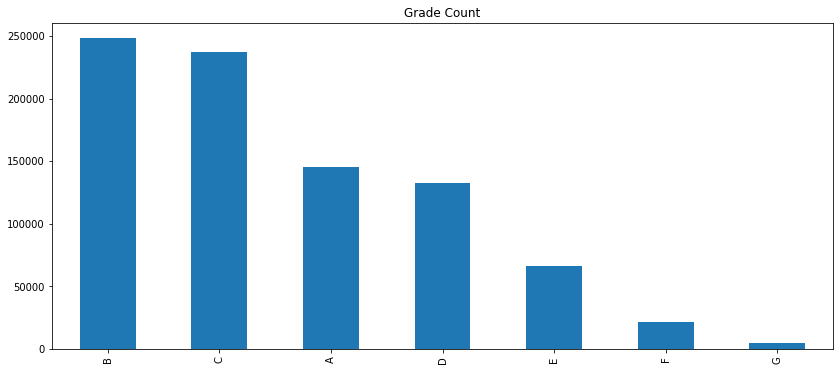

In [35]:
import matplotlib.cm as cm
plt.figure(figsize=(14, 6))

Credit_data1.grade.value_counts().plot(kind='bar').set_title('Grade Count')

Loan Purposes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

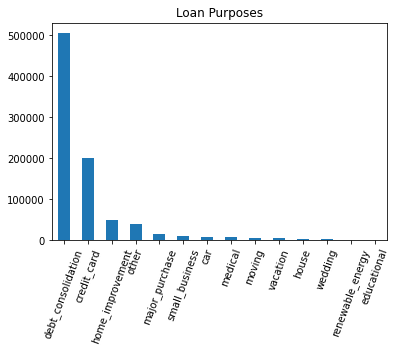

In [36]:
Credit_data1.purpose.value_counts().plot(kind='bar').set_title('Loan Purposes')
plt.xticks(rotation=70)

Debt Consolidation stands as clear winner for loan purpose, with more than 350K loans — or 58% from the total.

Other highlights include:

Credit Card  — more than 130K (~20%)

Home Improvement — more than 135K (~6%)

Other Purposes — less than 30K (~4%)

Text(0, 0.5, 'Loan Amount')

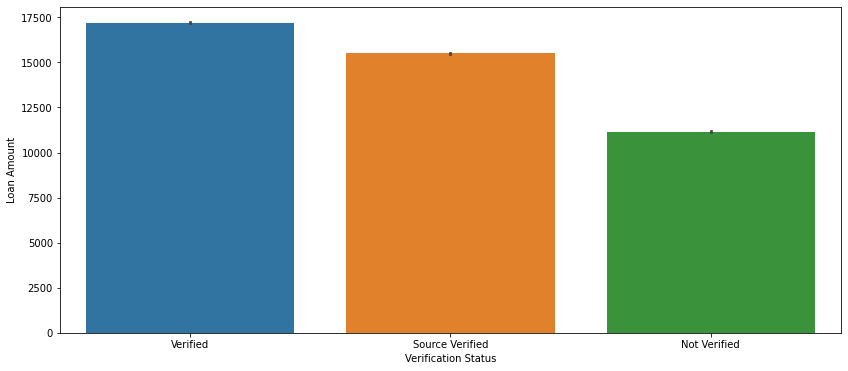

In [37]:
plt.figure(figsize=(14,6)) 

data = sns.barplot(x=Credit_data1.verification_status, y=Credit_data1.loan_amnt)

plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

# Grade Count

Text(0.5, 1.0, 'Grade Count')

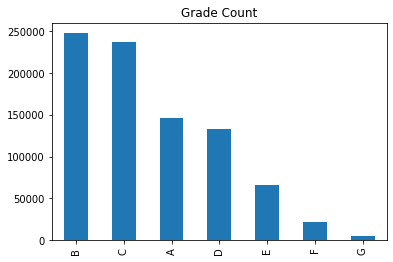

In [38]:
Credit_data1.grade.value_counts().plot(kind='bar').set_title('Grade Count')

It appears that B & C grade are the dominant ones

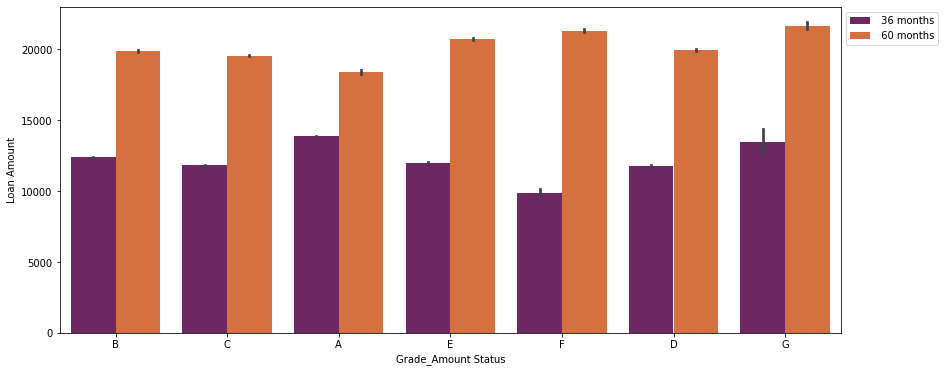

In [39]:
plt.figure(figsize=(14,6))

sns.barplot(x=Credit_data1.grade, y=Credit_data1.loan_amnt, hue=Credit_data1.term, palette="inferno")

plt.xlabel("Grade_Amount Status")
plt.ylabel("Loan Amount")

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)

(Text(0.5, 1.0, 'default_ind=0 vs grade'),
 Text(0.5, 1.0, 'default_ind=1 vs grade'))

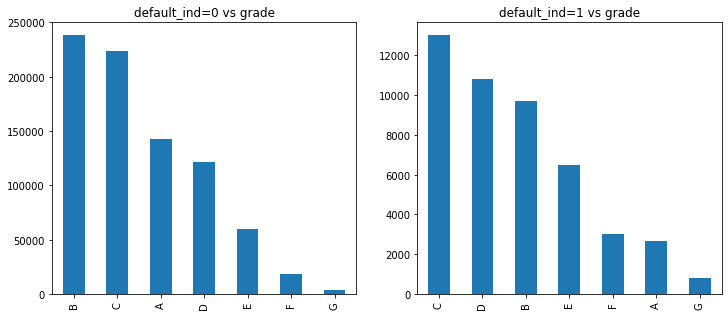

In [40]:
fig,array=plt.subplots(1,2,figsize=(12,5))
Credit_data1.loc[Credit_data1['default_ind']==0,'grade'].value_counts().plot.bar(ax=array[0])
Credit_data1.loc[Credit_data1['default_ind']==1,'grade'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs grade'),array[1].set_title('default_ind=1 vs grade')

#Issue_d
A unique assigned Id for the listing

Create a function that will split the issue_d varibale which is nothing but the The month which the loan was funded



In [41]:
def getMonth(x):
  return x.split('-')[0]

def getYear(x):
  return x.split('-')[1]

Credit_data1['Month'] = Credit_data1.issue_d.apply(getMonth)
Credit_data1['Year'] = Credit_data1.issue_d.apply(getYear) 



an exponential rise in the number of applications over a period of years

# Loan Status

we can see most of people take loan for debt_consolidation

Text(0.5, 1.0, 'Yearwise Distribution of defaulter')

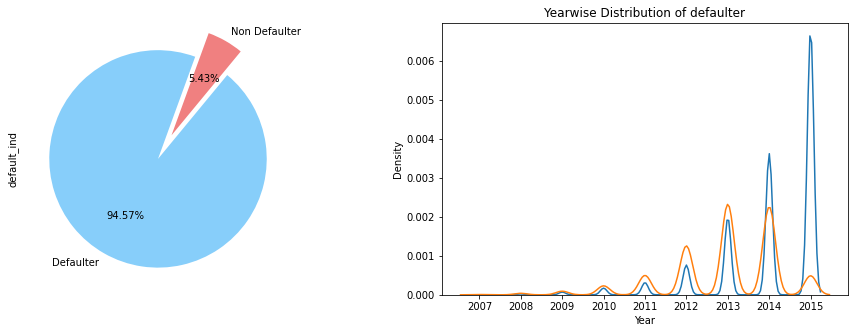

In [42]:
Credit_data1['Year'] = pd.to_datetime(Credit_data1['Year'])
fig, ax = plt.subplots(1, 2, figsize=(16,5))
Credit_data1['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['Defaulter','Non Defaulter'],
                                           colors = ['lightskyblue', 'lightcoral'], autopct='%1.2f%%',startangle=70, ax=ax[0])

sns.kdeplot(Credit_data1.loc[Credit_data1['default_ind']==0,'Year'],label='default_ind = 0')
sns.kdeplot(Credit_data1.loc[Credit_data1['default_ind']==1,'Year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')


#Loan issued by regions

In [43]:
Credit_data1.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

In [44]:
# Make a list with each of the regions by state.

west = ['WA','CA', 'OR', 'UT','ID','CO', 'NV', 'NM', 'AK', 'MT', 'HI', 'WY']
south_east = ['AZ', 'TX', 'OK','GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
Credit_data1['Region']= np.nan
def fix_regions(addr_state):
  if addr_state in west:
    return 'West'
  elif addr_state in south_east:
    return "South east"
  elif addr_state in mid_west:
    return 'Mid west'
  else:
      return 'north east'
Credit_data1['Region'] = Credit_data1['addr_state'].apply(fix_regions)




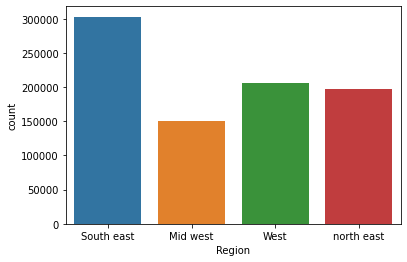

In [45]:
sns.countplot(Credit_data1.Region)

Text(0.5, 1.0, 'Loans issued by Region')

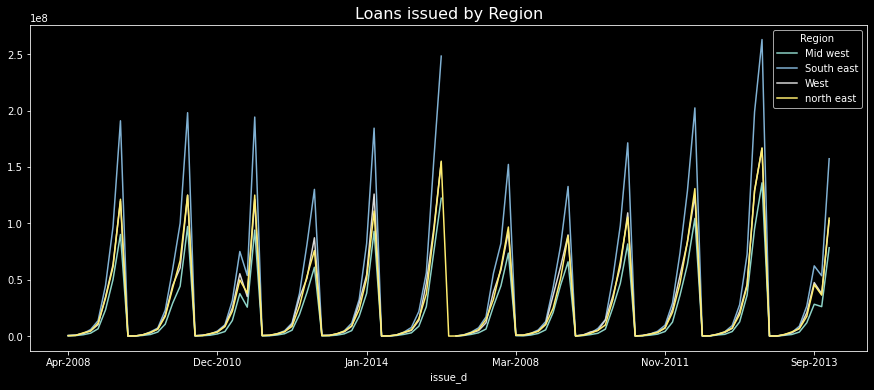

In [46]:
date_amt_region = Credit_data1[['loan_amnt','issue_d','Region']]
plt.style.use('dark_background')
cmap = plt.cm.Set3
by_issued_amount = date_amt_region.groupby(['issue_d', 'Region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

Text(0, 0.5, 'Data type')

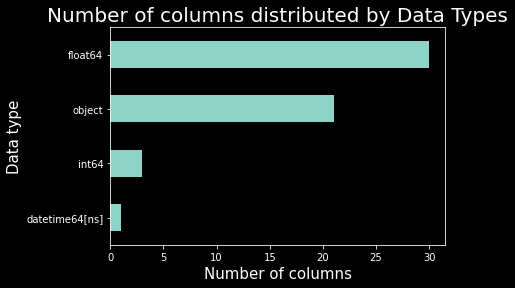

In [47]:
# Number of each type of column
Credit_data1.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [48]:
Credit_data1.shape

(855969, 55)

# Change categorical values into Intgers

In [49]:
Credit_data1['emp_length'] = Credit_data1['emp_length'].map({'< 1 year':0, '1 year':1, '2 years':2, 
                                                 '3 years':3, '4 years':4, '5 years':5, 
                                                 '6 years':6, '7 years':7, '8 years':8,
                                                 '9 years':9, '10+ years':10, 'None': 0})

In [50]:
Credit_data1['emp_length'].value_counts()

10    282090
0     110658
2      75986
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64


#initial_list_status 
Indicates whether the loan is an individual application or a joint application with two co-borrowers



In [51]:
Credit_data1['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

In [52]:
Credit_data1['initial_list_status'] = Credit_data1['initial_list_status'].map({'f':1,'w':2})
Credit_data1['initial_list_status'].value_counts()

1    442555
2    413414
Name: initial_list_status, dtype: int64

#verification_status
Was the income source verified

In [53]:
Credit_data1['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [54]:
Credit_data1['verification_status'] = Credit_data1['verification_status'].map({'Source Verified':1,'Verified':2, 'Not Verified':3})
Credit_data1['verification_status'].value_counts()

1    318178
2    280049
3    257742
Name: verification_status, dtype: int64


#home_ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [55]:
Credit_data1['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [56]:
Credit_data1['home_ownership'] = Credit_data1['home_ownership'].map({'MORTGAGE':1,'RENT':2,'OWN':3,'OTHER':4,'NONE':5,'ANY':6})
Credit_data1['home_ownership'].value_counts()

1    429106
2    342535
3     84136
4       144
5        45
6         3
Name: home_ownership, dtype: int64

# Terms

In [57]:
#print(Credit_data1['term'].value_counts())
Credit_data1['term'] = Credit_data1['term'].replace({'36 months':1,'60 months':2},regex = True)
Credit_data1['term'].value_counts()

1    600221
2    255748
Name: term, dtype: int64

#grade 
XYZ corp. assigned loan grade

In [58]:
Credit_data1['grade'] = Credit_data1['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
Credit_data1['grade'].value_counts()

2    247998
3    236855
1    145665
4    132802
5     66448
6     21328
7      4873
Name: grade, dtype: int64

#purpose 
A category provided by the borrower for the loan request.

In [59]:
Credit_data1['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [60]:
Credit_data1['purpose'] = Credit_data1['purpose'].map({'debt_consolidation':1, 'credit_card':2, 
                                       'home_improvement':3, 'other':4, 'major_purchase':5, 
                                       'small_business':6, 'car':7, 'medical':8,
                                       'moving':9, 'vacation':10, 'house':11,'wedding':12,
                                       'renewable_energy':13,'educational':14})
Credit_data1['purpose'].value_counts()

1     505392
2     200144
3      49956
4      40949
5      16587
6       9785
7       8593
8       8193
9       5160
10      4542
11      3513
12      2280
13       549
14       326
Name: purpose, dtype: int64

#Droping the Irrelevant Columns

In [61]:
# id variable because its a unique number
Credit_data1=Credit_data1.drop('id',axis=1)

# member_id variable because its a unique number
Credit_data1=Credit_data1.drop('member_id',axis=1)
# zip_code variable because its a unique number
Credit_data1=Credit_data1.drop('zip_code',axis=1)
# policy_code variable because it has same value for all observation
Credit_data1=Credit_data1.drop('policy_code',axis=1)

# payment_plan variable because it has same value for all observation
Credit_data1=Credit_data1.drop('pymnt_plan',axis=1)

In [62]:
# last_credit_pull_d variable because it's a date varibale with (102 level)
Credit_data1=Credit_data1.drop('last_credit_pull_d',axis=1)

# emp_title variable because it's a categorical varibale with (290912 level)
Credit_data1=Credit_data1.drop('emp_title',axis=1)

# title variable because it's a categorical varibale with (61000 level)
Credit_data1=Credit_data1.drop('title',axis=1)

# earliest_cr_line variable because it's a date varibale with (697 level)
Credit_data1=Credit_data1.drop('earliest_cr_line',axis=1)

# addr_state variable for trail purpose (51 level)
Credit_data1=Credit_data1.drop('addr_state',axis=1)
# last_pymnt_d variable for trail purpose (51 level)
Credit_data1=Credit_data1.drop('last_pymnt_d',axis=1)

# application_type is 'INDIVIDUAL' for 99.94% of the records
Credit_data1=Credit_data1.drop('application_type',axis=1)

# acc_now_delinq is 0 for 99.5% of the records
Credit_data1=Credit_data1.drop('acc_now_delinq',axis=1)
Credit_data1=Credit_data1.drop('Region',axis=1)
Credit_data1 = Credit_data1.drop('next_pymnt_d', axis=1)

In [63]:
# sub_grade variable for trail purpose (35 level)
Credit_data1=Credit_data1.drop('sub_grade',axis=1)
Credit_data1=Credit_data1.drop('Month',axis=1)
Credit_data1=Credit_data1.drop( 'Year',axis=1)

In [64]:
Credit_data1.shape

(855969, 37)

In [65]:
Credit_data1['str_split'] = Credit_data1.issue_d.str.split('-')
Credit_data1['m'] = Credit_data1.str_split.str.get(0)
Credit_data1['y']=Credit_data1.str_split.str.get(1)

In [66]:
Credit_data1['m'] = Credit_data1['m'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                              'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
                                  ,regex = True)

In [67]:
Credit_data1["period"] = Credit_data1["y"].map(str) + Credit_data1["m"]
Credit_data1_sort = Credit_data1.sort_values('period')

In [68]:
Credit_data1_sort_index = Credit_data1_sort.set_index('period')

# Dropping irrevelent  column

In [69]:
 #issue_d
Credit_data1_sort_index=Credit_data1_sort_index.drop('issue_d',axis=1)

# str_split
Credit_data1_sort_index=Credit_data1_sort_index.drop('str_split',axis=1)
# m
Credit_data1_sort_index=Credit_data1_sort_index.drop('m',axis=1)


# y
Credit_data1_sort_index=Credit_data1_sort_index.drop('y',axis=1)


In [70]:
Credit_data1_sort_index.shape

(855969, 36)

In [71]:
Credit_data1_sort_index.to_csv('Credit_data2.csv')

In [72]:
# Importing the dataset
data = pd.read_csv('Credit_data2.csv',index_col=0,low_memory=False)

In [73]:
data.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [74]:
data.shape

(855969, 36)

In [75]:
data

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.00,0.00,9194.98,980.65,7500.00,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.00,0.00,5174.17,4294.57,5000.00,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.00,0.00,6421.50,4104.19,5750.00,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.00,0.00,5593.39,4446.74,5000.00,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.00,0.00,1425.37,0.00,1200.00,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201512,1,3,8,2,2,1,1,14400.0,14400.0,14400.0,11.99,478.22,57000.0,22.15,0.0,0.0,9.0,0.0,9751.0,75.0,13.0,14065.66,14065.66,459.04,459.04,334.34,124.70,0.0,0.0,0.0,478.22,0.0,0.0,35418.0,13000.0,0
201512,1,1,0,1,3,2,2,20000.0,20000.0,20000.0,5.32,602.30,99000.0,12.61,0.0,0.0,11.0,0.0,18184.0,33.4,19.0,19486.37,19486.37,596.39,596.39,513.63,82.76,0.0,0.0,0.0,602.30,0.0,0.0,35828.0,54400.0,0
201512,2,3,9,2,2,1,2,12000.0,12000.0,12000.0,13.67,277.18,40000.0,30.30,0.0,1.0,10.0,0.0,12113.0,57.7,20.0,11859.52,11859.52,268.07,268.07,140.48,127.59,0.0,0.0,0.0,277.18,0.0,0.0,66850.0,21000.0,0


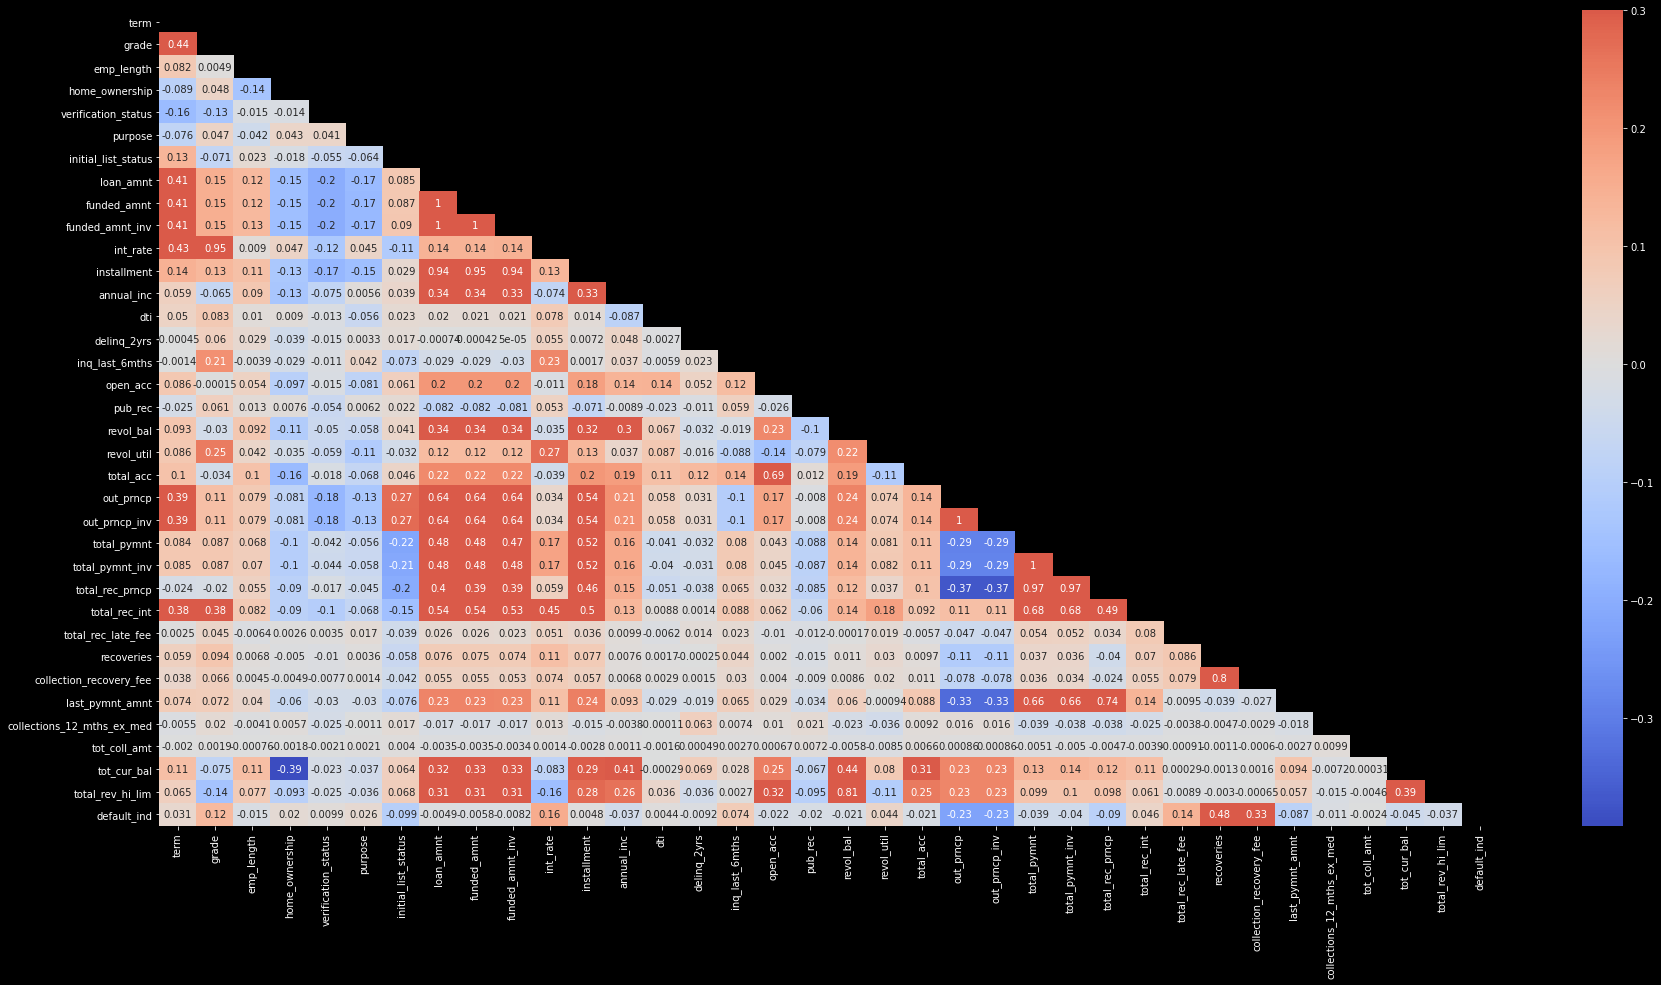

In [76]:
plt.figure(figsize=(30,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix, vmax= 0.3, cmap = 'coolwarm', center= 0 )

# Data Partition
train --> ( June 2007 – May 2015 )

test --> ( June 2015 – Dec 2015 )

So I have decided to treat the date column(‘issue_d’).First, I split the column(‘issue_d’) into two different columns and replace the values as my requirement.After that with the help of map function I joined the splited columns and make them one with different name (‘period’). Then I sort the ‘period’ column and make it an index for slicing according to the requirement

#As per the requirement i have sliced the data in train and test.
Train

In [77]:
train_data = data.loc['200706':'201505',:]
train_data.shape

(598978, 36)

# Test

In [78]:
test_data = data.loc['201506':'201512',:]
test_data.shape

(256991, 36)

In [79]:
train_data.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [80]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]

In [81]:
x_cols

[['loan_amnt',
  'funded_amnt',
  'funded_amnt_inv',
  'term',
  'int_rate',
  'installment',
  'grade',
  'emp_length',
  'home_ownership',
  'annual_inc',
  'verification_status',
  'purpose',
  'dti',
  'delinq_2yrs',
  'inq_last_6mths',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'revol_util',
  'total_acc',
  'initial_list_status',
  'out_prncp',
  'out_prncp_inv',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_prncp',
  'total_rec_int',
  'total_rec_late_fee',
  'recoveries',
  'collection_recovery_fee',
  'last_pymnt_amnt',
  'collections_12_mths_ex_med',
  'tot_coll_amt',
  'tot_cur_bal',
  'total_rev_hi_lim']]

In [82]:
x_train = pd.DataFrame(train_data.values[:,:-1],columns=x_cols)

In [83]:
x_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1.0,5.0,0.0,3.0,3.0,1.0,1.0,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0
1,1.0,1.0,8.0,1.0,3.0,3.0,1.0,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0
2,1.0,1.0,10.0,1.0,3.0,1.0,1.0,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0
3,1.0,1.0,6.0,2.0,3.0,7.0,1.0,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0
4,1.0,3.0,0.0,2.0,3.0,2.0,1.0,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0


In [84]:
y_train = pd.DataFrame(train_data.values[:,-1],columns=y_cols)
y_train

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
598973,0.0
598974,0.0
598975,0.0
598976,0.0


In [85]:
x_test = pd.DataFrame(test_data.values[:,:-1],columns=x_cols)
x_test

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,35000.0,35000.0,35000.0,9.17,1115.77,130000.0,26.59,0.0,0.0,25.0,0.0,45846.0,65.0,44.0,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,0.0,1115.77,0.0,0.0,227294.0,70500.0
1,2.0,2.0,10.0,2.0,1.0,1.0,2.0,11500.0,11500.0,11475.0,9.17,239.68,74000.0,23.61,0.0,0.0,7.0,0.0,20480.0,61.1,11.0,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,0.0,239.68,0.0,0.0,56802.0,33500.0
2,2.0,4.0,2.0,2.0,1.0,1.0,2.0,12000.0,12000.0,12000.0,15.61,289.34,48000.0,31.40,0.0,1.0,9.0,0.0,15264.0,74.8,23.0,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,0.0,289.34,0.0,0.0,60872.0,20400.0
3,1.0,3.0,3.0,1.0,2.0,1.0,2.0,35000.0,35000.0,35000.0,12.29,1167.36,121000.0,22.18,3.0,0.0,10.0,0.0,27999.0,76.9,35.0,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,0.0,1167.36,0.0,0.0,277104.0,36400.0
4,2.0,2.0,10.0,1.0,1.0,2.0,2.0,27000.0,27000.0,27000.0,8.18,549.80,100000.0,18.73,0.0,0.0,16.0,0.0,28486.0,61.0,39.0,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,0.0,549.80,0.0,0.0,209664.0,46700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256986,1.0,3.0,8.0,2.0,2.0,1.0,1.0,14400.0,14400.0,14400.0,11.99,478.22,57000.0,22.15,0.0,0.0,9.0,0.0,9751.0,75.0,13.0,14065.66,14065.66,459.04,459.04,334.34,124.70,0.0,0.0,0.0,478.22,0.0,0.0,35418.0,13000.0
256987,1.0,1.0,0.0,1.0,3.0,2.0,2.0,20000.0,20000.0,20000.0,5.32,602.30,99000.0,12.61,0.0,0.0,11.0,0.0,18184.0,33.4,19.0,19486.37,19486.37,596.39,596.39,513.63,82.76,0.0,0.0,0.0,602.30,0.0,0.0,35828.0,54400.0
256988,2.0,3.0,9.0,2.0,2.0,1.0,2.0,12000.0,12000.0,12000.0,13.67,277.18,40000.0,30.30,0.0,1.0,10.0,0.0,12113.0,57.7,20.0,11859.52,11859.52,268.07,268.07,140.48,127.59,0.0,0.0,0.0,277.18,0.0,0.0,66850.0,21000.0
256989,1.0,2.0,2.0,2.0,1.0,3.0,2.0,35000.0,35000.0,35000.0,11.22,1149.51,120000.0,2.82,0.0,0.0,11.0,0.0,4801.0,18.6,22.0,34177.74,34177.74,1127.69,1127.69,822.26,305.43,0.0,0.0,0.0,1149.51,0.0,0.0,9224.0,25800.0


In [86]:
y_test =pd.DataFrame(test_data.values[:,-1],columns=y_cols)
y_test

,default_ind
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
256986,0.0
256987,0.0
256988,0.0
256989,0.0


#Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_scale = pd.DataFrame(sc.fit_transform(x_train),columns=x_cols)
x_test_scale = pd.DataFrame(sc.transform(x_test),columns=x_cols)

#Modle building

In [88]:
new_df = pd.concat([train_data,test_data])

new_df.shape

(855969, 36)

In [89]:
new_df= new_df.reset_index()
new_df.shape

(855969, 37)

In [90]:
new_df

,period,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.00,0.00,9194.98,980.65,7500.00,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
1,200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.00,0.00,5174.17,4294.57,5000.00,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
2,200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.00,0.00,6421.50,4104.19,5750.00,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
3,200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.00,0.00,5593.39,4446.74,5000.00,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
4,200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.00,0.00,1425.37,0.00,1200.00,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,201512,1,3,8,2,2,1,1,14400.0,14400.0,14400.0,11.99,478.22,57000.0,22.15,0.0,0.0,9.0,0.0,9751.0,75.0,13.0,14065.66,14065.66,459.04,459.04,334.34,124.70,0.0,0.0,0.0,478.22,0.0,0.0,35418.0,13000.0,0
855965,201512,1,1,0,1,3,2,2,20000.0,20000.0,20000.0,5.32,602.30,99000.0,12.61,0.0,0.0,11.0,0.0,18184.0,33.4,19.0,19486.37,19486.37,596.39,596.39,513.63,82.76,0.0,0.0,0.0,602.30,0.0,0.0,35828.0,54400.0,0
855966,201512,2,3,9,2,2,1,2,12000.0,12000.0,12000.0,13.67,277.18,40000.0,30.30,0.0,1.0,10.0,0.0,12113.0,57.7,20.0,11859.52,11859.52,268.07,268.07,140.48,127.59,0.0,0.0,0.0,277.18,0.0,0.0,66850.0,21000.0,0
855967,201512,1,2,2,2,1,3,2,35000.0,35000.0,35000.0,11.22,1149.51,120000.0,2.82,0.0,0.0,11.0,0.0,4801.0,18.6,22.0,34177.74,34177.74,1127.69,1127.69,822.26,305.43,0.0,0.0,0.0,1149.51,0.0,0.0,9224.0,25800.0,0


In [91]:
X = new_df.values[:,1:-1]
Y = new_df.values[:,-1]

In [92]:
# scalling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [93]:
# use manual method for data partition 

X_train = X[:598978]
X_test = X[598978:]
Y_train = Y[:598978]
Y_test = Y[598978:]

In [94]:
Y_train=Y_train.astype(int)
Y_test= Y_test.astype(int)

Creating a Custom Confusion Metrics

In [95]:
# Custom Confusion Metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

##Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
Y_pred = classifier.predict(X_test)

In [98]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test_scale, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [99]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(x_train_scale, y_train)))

Accuracy of logistic regression classifier on train set: 1.00


Confusion Matrix, Without Normalisation
[[256629     51]
 [    63    248]]


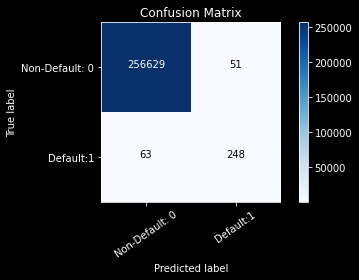

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995564046989972


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
conf_matrix = confusion_matrix(Y_test,Y_pred)

plot_confusion_metrix(conf_matrix, classes=['Non-Default: 0', 'Default:1'])
plt.show()
print('Classification report')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)


Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

#Tunnig the model

In [101]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[0.99883939 0.00116061]
 [0.99731048 0.00268952]
 [0.99352614 0.00647386]
 ...
 [0.99108992 0.00891008]
 [0.99507849 0.00492151]
 [0.99555238 0.00444762]]


In [102]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

Confusion Matrix, Without Normalisation
[[256639     41]
 [    63    248]]


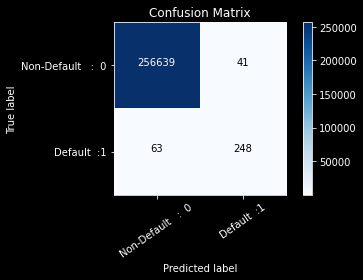

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995953165675062


In [103]:

from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)

#Using cross validation

In [104]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.98597616 0.99414004 0.99741227 0.99792981 0.9966443  0.99656082
 0.99724532 0.99701159 0.99737883 0.99791308]
0.9958212215631871


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Decision Tree

In [105]:
#Running Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=8,random_state=0,)
model_DecisionTree.fit(x_train_scale,y_train)

#fit the model on the data and predict the values 

y_pred1 = model_DecisionTree.predict(x_test_scale)

In [106]:
y_pred1

array([0., 0., 1., ..., 1., 1., 1.])

In [107]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_DecisionTree.score(x_test_scale, y_test)))

Accuracy of logistic regression classifier on test set: 0.26


In [108]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model_DecisionTree.score(x_train_scale, y_train)))

Accuracy of logistic regression classifier on train set: 1.00


Confusion Matrix, Without Normalisation
[[ 67035 189645]
 [     2    309]]


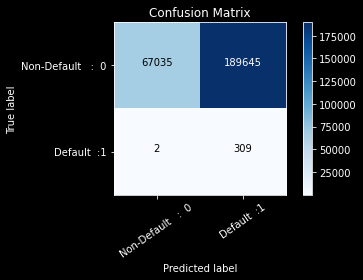

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.26      0.41    256680
         1.0       0.00      0.99      0.00       311

    accuracy                           0.26    256991
   macro avg       0.50      0.63      0.21    256991
weighted avg       1.00      0.26      0.41    256991

Accuracy of the model: 0.26204808728710344


In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred1)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred1))

acc= accuracy_score(y_test,y_pred1)
print("Accuracy of the model:", acc)

# Random Forest

Fitting Random forest classification to the training set

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
# creat Rendom Forest model
Random_forest_model = RandomForestClassifier(n_estimators= 100, random_state= 0)

In [112]:
#Fitting the model
Random_forest_model.fit(x_train_scale,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [113]:
# Predicting the Test set results
y_pred2=Random_forest_model.predict(x_test_scale)

In [114]:
print('Accuracy of Random forest classifier on train set: {:.2f}'.format(Random_forest_model.score(x_train_scale, y_train)))

Accuracy of Random forest classifier on train set: 1.00


In [115]:
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(Random_forest_model.score(x_test_scale, y_test)))

Accuracy of Random forest classifier on test set: 0.37


Confusion Matrix, Without Normalisation
[[ 95507 161173]
 [     1    310]]


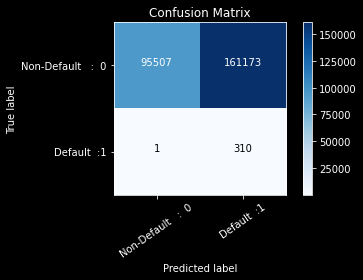

Classification report for Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.37      0.54    256680
         1.0       0.00      1.00      0.00       311

    accuracy                           0.37    256991
   macro avg       0.50      0.68      0.27    256991
weighted avg       1.00      0.37      0.54    256991

Accuracy of the model: 0.3728418504928188


In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(y_test, y_pred2)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report for Random Forest')

print(classification_report(y_test,y_pred2))

acc= accuracy_score(y_test,y_pred2)
print("Accuracy of the model:", acc)

#XGBoost 

In [117]:
from xgboost import XGBClassifier


In [118]:
XG_Model = XGBClassifier()


In [119]:
#Fit the model
XG_Model.fit(x_train_scale,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
pred_xgb = XG_Model.predict(x_test_scale)

In [121]:
print('Accuracy of Adaboost classifier on train set: {:.2f}'.format(XG_Model.score(x_train_scale, y_train)))

Accuracy of Adaboost classifier on train set: 1.00


In [122]:
print('Accuracy of Xgboost classifier on test set: {:.2f}'.format(XG_Model.score(x_test_scale, y_test)))


Accuracy of Xgboost classifier on test set: 0.79


#Confusion Metrix

Confusion matrix for XGboost forest:
Confusion Matrix, Without Normalisation
[[ 95507 161173]
 [     1    310]]


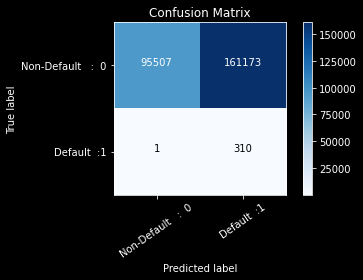

Classification report for XGboost
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88    256680
         1.0       0.01      0.91      0.01       311

    accuracy                           0.79    256991
   macro avg       0.50      0.85      0.45    256991
weighted avg       1.00      0.79      0.88    256991

Accuracy of the model: 0.7907981213349884


In [123]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for XGboost forest:")
confusion_matrix_xgb = confusion_matrix(y_test, pred_xgb)

plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report for XGboost')

print(classification_report(y_test,pred_xgb))

acc= accuracy_score(y_test,pred_xgb)
print("Accuracy of the model:", acc)

#Adaboost

In [124]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost_model = AdaBoostClassifier(n_estimators=100,random_state=0)
#Fitting the model
Adaboost_model.fit(x_train_scale, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

## Predicting the test set results and caculating the accuracy

In [125]:
Ada_pred = Adaboost_model.predict(x_test_scale)

In [126]:
print('Accuracy of Adaboost classifier on train set: {:.2f}'.format(Adaboost_model.score(x_train_scale, y_train)))

In [ ]:
print('Accuracy of Adaboost classifier on test set: {:.2f}'.format(Adaboost_model.score(x_test_scale, y_test)))

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for ADBboost forest:")
confusion_matrix_ADB = confusion_matrix(y_test, Ada_pred)

plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report for ADBboost')

print(classification_report(y_test,Ada_pred))

acc= accuracy_score(y_test,Ada_pred)
print("Accuracy of the model:", acc)

#  Conclusion 




In [129]:
import pandas as pd

df_accuracy= pd.DataFrame({"Random Forest":{"Accuracy on train data":"100%","Accuracy on test data":"37%","F1 Score for 'No'":"54%","F1 Score for 'Yes'":"0%", "Accuracy":"37%"},
                  "XGBoost":{"Accuracy on train data":"100%","Accuracy on test data":"79%","F1 Score for 'No'":"88%","F1 Score for 'Yes'":"1%", "Accuracy": "79%"},
                  "Adaboost":{"Accuracy on train data":"99%","Accuracy on test data":"90%","F1 Score for 'No'":"95%","F1 Score for 'Yes'":"2%", "Accuracy": "90%"},
                  "Decision Tree":{"Accuracy on train data": "100%", "Accuracy on test data": "26%", "F1 Score for 'No'":"41%", "F1 Score for 'Yes'":"0%", "Accuracy":"26%"},
                  "Logistic Regression": {"Accuracy on train data":"100%", "Accuracy on test data":"99%", "F1 Score for 'No'":"100%",  "F1 Score for 'Yes'":"81%", "Accuracy":"99%"}})

In [130]:
df_accuracy

,Random Forest,XGBoost,Adaboost,Decision Tree,Logistic Regression
Accuracy on train data,100%,100%,99%,100%,100%
Accuracy on test data,37%,79%,90%,26%,99%
F1 Score for 'No',54%,88%,95%,41%,100%
F1 Score for 'Yes',0%,1%,2%,0%,81%
Accuracy,37%,79%,90%,26%,99%


#Final Model
##Logistic Regression 

We can see the Best Model for the "XYZ_ Corporation Lending data" is Logisic Regression it gives us 99% Accuracy.

In [131]:
data.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0


In [133]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [134]:
x.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0
200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0
200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0
200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0
200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0


In [136]:
y.head()

period
200706    0
200707    0
200707    0
200707    0
200707    0
Name: default_ind, dtype: int64

In [137]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction on Full Data

In [139]:
Y_full_pred=classifier.predict(x)

In [140]:
Y_full_pred

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
x.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0
200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0
200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0
200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0
200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0


In [142]:
final_df = pd.DataFrame()

In [143]:
final_df = pd.concat([x,y],axis=1)

In [144]:
final_df.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0
200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0
200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0
200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0
200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0


In [145]:
final_df['Predicted_class']=Y_full_pred

In [146]:
final_df.shape

(855969, 37)

In [147]:
final_df.head(10)

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,Predicted_class
period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200706,1,5,0,3,3,1,1,7500.0,7500.0,800.0,13.75,255.43,22000.0,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,0.0,81008.5,23800.0,0,0
200707,1,1,8,1,3,3,1,5000.0,5000.0,4150.0,7.43,155.38,150000.0,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,0.0,81008.5,23800.0,0,0
200707,1,1,10,1,3,1,1,5750.0,5750.0,3675.0,7.43,178.69,125000.0,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,0.0,81008.5,23800.0,0,0
200707,1,1,6,2,3,7,1,5000.0,5000.0,3975.0,7.43,155.38,40000.0,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,0.0,81008.5,23800.0,0,0
200707,1,3,0,2,3,2,1,1200.0,1200.0,0.0,11.54,39.60,20000.0,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,0.0,81008.5,23800.0,0,0
200707,1,3,3,2,3,6,1,12250.0,12250.0,1525.0,10.59,398.69,60000.0,17.12,1.0,2.0,10.0,0.0,17214.0,8.1,24.0,0.0,0.0,13128.80,1634.39,12250.0,878.80,0.0,0.0,0.0,9939.88,0.0,0.0,81008.5,23800.0,0,0
200707,1,6,1,2,3,1,1,2700.0,2700.0,550.0,15.96,94.88,52200.0,12.57,0.0,1.0,12.0,0.0,3075.0,92.3,13.0,0.0,0.0,3415.00,695.54,2700.0,715.00,0.0,0.0,0.0,96.40,0.0,0.0,81008.5,23800.0,0,0
200707,1,2,1,1,3,4,1,5000.0,5000.0,1775.0,9.01,159.03,250000.0,10.00,2.0,0.0,5.0,0.0,14354.0,36.6,7.0,0.0,0.0,5724.82,2032.29,5000.0,724.82,0.0,0.0,0.0,160.61,0.0,0.0,81008.5,23800.0,0,0
200707,1,2,0,2,3,14,1,3500.0,3500.0,1200.0,9.96,112.87,13500.0,16.44,0.0,1.0,10.0,0.0,2864.0,41.1,16.0,0.0,0.0,3941.83,1351.44,3500.0,441.83,0.0,0.0,0.0,1798.54,0.0,0.0,81008.5,23800.0,0,0


#Export the final data-frame to Root Directory

In [148]:
final_df.to_csv('final_data_with_prediction.csv')

#                                  **  The End**